In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline


In [2]:
Data=pd.read_csv("AirQuality.xlsx - AirQualityUCI.csv")


In [3]:
Data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/3/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/3/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/3/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/3/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [31]:
Data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


  We need to check the correlation of the data before apllying any model on the data

In [32]:
Data.corr()

C:\Users\MR_X\AppData\Local\Temp\ipykernel_2188\3328628840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


from the given data we could eliminate the data with correlation with RH less than 0.05

hence CO(GT)and  NMHC(GT) 

C:\Users\MR_X\AppData\Local\Temp\ipykernel_2188\3591717884.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr())


<AxesSubplot: >

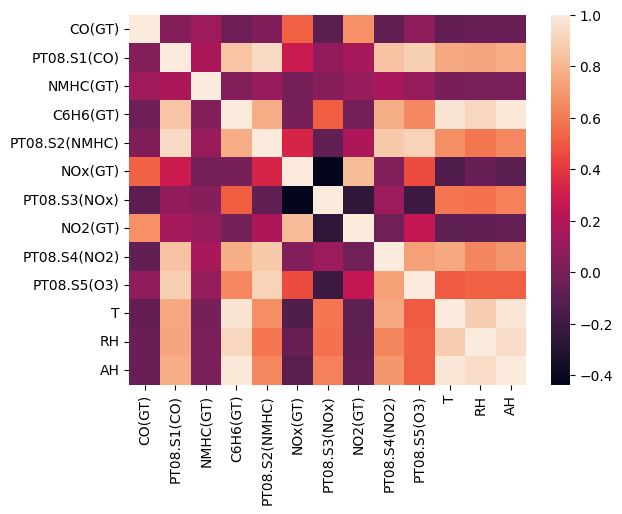

In [5]:
sns.heatmap(Data.corr())

In [33]:
X=Data[["PT08.S1(CO)","PT08.S2(NMHC)","NOx(GT)","PT08.S3(NOx)","NO2(GT)","PT08.S5(O3)","T","AH"]]

In [34]:
X.head()

,PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,AH
0,1360,1046,166,1056,113,1268,13.6,0.7578
1,1292,955,103,1174,92,972,13.3,0.7255
2,1402,939,131,1140,114,1074,11.9,0.7502
3,1376,948,172,1092,122,1203,11.0,0.7867
4,1272,836,131,1205,116,1110,11.2,0.7888


In [35]:
Y=Data[["RH"]]

In [36]:
Y.head()

,RH
0,48.9
1,47.7
2,54.0
3,60.0
4,59.6


In [37]:
from sklearn.model_selection import train_test_split

# Liniar Regression

In [38]:
X_train, X_test,y_train ,y_test = train_test_split(X,Y,test_size=0.4,random_state=123,shuffle=True)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
LR=LinearRegression()

In [41]:
LR.fit(X_train,y_train)

LinearRegression()

In [44]:
print(LR.intercept_)

[73.63290246]


In [45]:
coeff=pd.DataFrame(LR.coef_.transpose,X_train.columns,columns=['Coefficient'])

In [46]:
LR.intercept_

array([73.63290246])

In [47]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(LR.coef_))], axis = 1)

In [48]:
coefficients

,0,0
0,PT08.S1(CO),0.034882
1,PT08.S2(NMHC),-0.040496
2,NOx(GT),0.015998
3,PT08.S3(NOx),-0.013987
4,NO2(GT),-0.050349
5,PT08.S5(O3),0.003290
6,T,-1.028001
7,AH,2.413622


In [49]:
prediction=LR.predict(X_test)

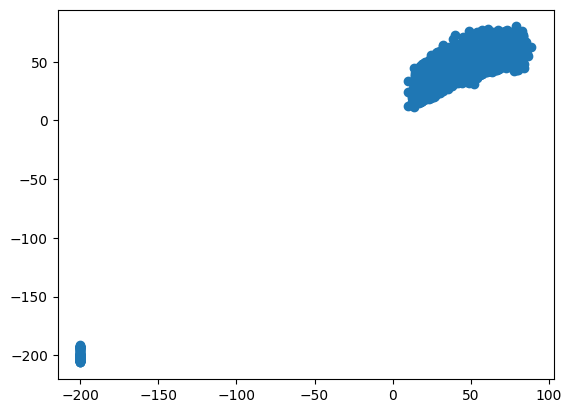

In [50]:
plt.pyplot.scatter(y_test,prediction)

In [51]:
df=pd.DataFrame()
df["actuall"]=y_test
df["pred"]=prediction
df["error"]=abs(((df.pred-df.actuall)/df.actuall)*100)
df["Accuracy"]=100-df.error

In [52]:
df

,actuall,pred,error,Accuracy
5240,84.6,60.406322,28.597728,71.402272
7651,41.6,59.261486,42.455494,57.544506
8959,68.3,63.354037,7.241528,92.758472
2095,54.9,40.628585,25.995292,74.004708
3357,15.0,18.719524,24.796829,75.203171
...,...,...,...,...
5967,36.0,44.470097,23.528047,76.471953
3789,16.9,21.767924,28.804281,71.195719
8733,34.5,56.264695,63.086074,36.913926
3733,61.9,42.478115,31.376228,68.623772


In [58]:
np.mean(df.Accuracy)

77.8602273225294

In [59]:
from sklearn import metrics

In [60]:
Error=metrics.mean_absolute_percentage_error(y_test,prediction)

In [56]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,prediction))

In [63]:
RMSE

11.993156761612848

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression 

In [67]:
LoR=LogisticRegression()

In [70]:
from sklearn import preprocessing

In [71]:
lab_enc = preprocessing.LabelEncoder()

C:\Users\MR_X\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
LoR.fit(X_train, lab_enc.fit_transform(y_train))

C:\Users\MR_X\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MR_X\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
prediction1=LoR.predict(X_test) 
prediction1

array([458, 402, 530, ..., 368, 203, 341], dtype=int64)

In [90]:
df1=pd.DataFrame()
df1["actuall"]=y_test
df1["pred"]=prediction1
df1["error"]=(abs((df1.pred-df1.actuall)/df1.actuall)*100)
df1["Accuracy"]=abs(100-df1.error) if np.mean(df1["error"])<100 else 0 
df1

,actuall,pred,error,Accuracy
5240,84.6,458,441.371158,0
7651,41.6,402,866.346154,0
8959,68.3,530,675.988287,0
2095,54.9,341,521.129326,0
3357,15.0,88,486.666667,0
...,...,...,...,...
5967,36.0,363,908.333333,0
3789,16.9,67,296.449704,0
8733,34.5,368,966.666667,0
3733,61.9,203,227.948304,0


In [96]:
np.mean(df1["error"])

594.2653907728376

In [91]:
np.mean(df1["Accuracy"])

0.0

In [94]:
Error=metrics.mean_absolute_percentage_error(y_test,prediction1)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,prediction1))

In [98]:
Error

5.942653907728376

In [95]:
RMSE

324.9808699686467

Logistic Regression has a high error hence this model cannot be considered 

Liniar Regression is the better model that can be used for t;his model 